In [1]:
# import aquacrop functions (the * simply means 'all')
from aquacrop.classes import    *
from aquacrop.core import       *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Climate Measurements

In [2]:
# locate built in weather file
filepath=get_filepath('brussels_climate.txt')

weather_data = prepare_weather(filepath)
weather_data

,MinTemp,MaxTemp,Precipitation,ReferenceET,Date
0,3.0,10.6,5.3,0.3,1976-01-01
1,4.1,11.8,2.7,0.5,1976-01-02
2,6.1,7.2,0.2,0.9,1976-01-03
3,1.6,6.5,2.6,0.5,1976-01-04
4,1.7,9.4,3.4,0.2,1976-01-05
...,...,...,...,...,...
10953,-2.2,-0.8,1.4,0.3,2005-12-27
10954,-6.3,-0.8,0.0,0.3,2005-12-28
10955,-7.0,-0.3,0.4,0.1,2005-12-29
10956,-3.8,2.1,7.3,0.4,2005-12-30


## Soil

In [3]:
sandy_loam = SoilClass(soilType='SandyLoam')

## Crop calibration

In [4]:
Rel=60
RedaCCx=74
CCx=92

potato = CropClass('Potato_t', PlantingDate='05/01',need_calib=1,RelativeBio=Rel/100,Ksccx_in=RedaCCx/CCx,fcdecline_in=1)

In [5]:
InitWC = InitWCClass(value=['FC'])

In [6]:
# combine into aquacrop model and specify start and end simulation date
model = AquaCropModel(SimStartTime=f'{1976}/05/01',
                      SimEndTime=f'{1976}/07/24',
                      wdf=weather_data,
                      Soil=sandy_loam,
                      Crop=potato,
                      InitWC=InitWC)

In [7]:
# initilize model
model.initialize()

In [8]:
print(model.Crop.Ksccx_in*CCx)
print(100-100*model.Crop.Ksexpf_es[0])
print(100*model.Crop.fcdecline_es[0])
print(100-100*model.Crop.Kswp_es[0])

74.0
12.0
0.16875
49.000000000000036


In [9]:
sf_es=model.Crop.sf_es
Ksexpf_es=model.Crop.Ksexpf_es
fcdecline_es=model.Crop.fcdecline_es
Kswp_es=model.Crop.Kswp_es
Ksccx_es=model.Crop.Ksccx_es
relbio_es=model.Crop.relbio_es

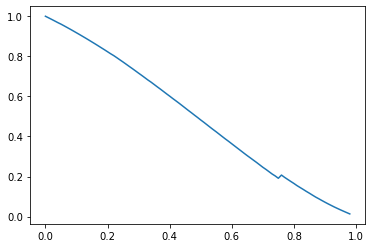

In [10]:
import matplotlib.pyplot as plt
plt.plot(sf_es[1:100], relbio_es[1:100])


In [11]:
sf_es[0:100]

array([0.39205947, 0.        , 0.01      , 0.02      , 0.03      ,
       0.04      , 0.05      , 0.06      , 0.07      , 0.08      ,
       0.09      , 0.1       , 0.11      , 0.12      , 0.13      ,
       0.14      , 0.15      , 0.16      , 0.17      , 0.18      ,
       0.19      , 0.2       , 0.21      , 0.22      , 0.23      ,
       0.24      , 0.25      , 0.26      , 0.27      , 0.28      ,
       0.29      , 0.3       , 0.31      , 0.32      , 0.33      ,
       0.34      , 0.35      , 0.36      , 0.37      , 0.38      ,
       0.39      , 0.4       , 0.41      , 0.42      , 0.43      ,
       0.44      , 0.45      , 0.46      , 0.47      , 0.48      ,
       0.49      , 0.5       , 0.51      , 0.52      , 0.53      ,
       0.54      , 0.55      , 0.56      , 0.57      , 0.58      ,
       0.59      , 0.6       , 0.61      , 0.62      , 0.63      ,
       0.64      , 0.65      , 0.66      , 0.67      , 0.68      ,
       0.69      , 0.7       , 0.71      , 0.72      , 0.73   

In [12]:
relbio_es[0:100]

array([0.60794053, 1.        , 0.992255  , 0.98436695, 0.9763697 ,
       0.96821644, 0.96065862, 0.95230817, 0.9437672 , 0.93517882,
       0.92639973, 0.91748211, 0.90857076, 0.89943082, 0.89029335,
       0.88094347, 0.87146014, 0.86203282, 0.852356  , 0.84254769,
       0.8328526 , 0.82286771, 0.8127538 , 0.80350331, 0.79296313,
       0.78217257, 0.77155794, 0.76054284, 0.74939704, 0.73854246,
       0.72727421, 0.71589643, 0.70485314, 0.69337802, 0.68179918,
       0.6712089 , 0.6595514 , 0.647796  , 0.63645311, 0.62464728,
       0.61274939, 0.60127263, 0.58934502, 0.57787276, 0.56629334,
       0.55427098, 0.54217714, 0.5300146 , 0.51841314, 0.5062814 ,
       0.49454029, 0.48229704, 0.47073909, 0.4585687 , 0.44636497,
       0.4344542 , 0.42296463, 0.41083989, 0.3987104 , 0.38676825,
       0.37535951, 0.3633894 , 0.35146761, 0.3395589 , 0.32769998,
       0.31569684, 0.30398084, 0.29277136, 0.28135383, 0.27004509,
       0.25811266, 0.2461687 , 0.23551737, 0.22404068, 0.21248

In [13]:
p_com=np.sum(model.Crop.Kswp_es>0)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x=100-model.Crop.Ksexpf_es[0:p_com]*100, y=model.Crop.fcdecline_es[0:p_com]*100, z=100-model.Crop.Kswp_es[0:p_com]*100)
fig.show()

# Crop simulation

In [76]:
potato = CropClass('Potato_t', PlantingDate='05/01')

In [11]:
ccx_=20
cgc_=12
dcc_=0.17
wp_=52
stress=40

potato = CropClass('Potato_t', PlantingDate='05/01',Ksccx=1-ccx_/100,Ksexpf=1-cgc_/100,Kswp=1-wp_/100,fcdecline=dcc_/100,\
                 sfertstress=stress/100,sf_es=sf_es,Ksexpf_es=Ksexpf_es,fcdecline_es=fcdecline_es,Kswp_es=Kswp_es,\
                Ksccx_es=Ksccx_es,relbio_es=relbio_es)

In [12]:
InitWC = InitWCClass(value=['FC'])

In [13]:
irr_mngt = IrrMngtClass(IrrMethod=0) # specify irrigation management

In [14]:
# combine into aquacrop model and specify start and end simulation date
model = AquaCropModel(SimStartTime=f'{1976}/05/01',
                      SimEndTime=f'{1976}/07/24',
                      wdf=weather_data,
                      Soil=sandy_loam,
                      Crop=potato,
                      InitWC=InitWC,
                      IrrMngt=irr_mngt)

In [15]:
# initilize model
model.initialize()
# run model till termination
model.step(till_termination=True)

In [16]:
# model.Outputs.Flux.head()
# model.Outputs.Water.head()
# model.Outputs.Growth.head()
model.Outputs.Final.head()

,Season,Crop Type,Harvest Date (YYYY/MM/DD),Harvest Date (Step),Yield (tonne/ha),Seasonal irrigation (mm)
0,0,Potato_t,1976-07-24,83,3.422037,0.0


In [17]:
model.Outputs.Growth.to_csv('Growth_temp.csv')

In [18]:
model.Outputs.Flux.to_csv('Flux_temp.csv')

In [19]:
model.Outputs.Flux.groupby('SeasonCounter').sum()['Tr']

SeasonCounter
0.0    162.42396
Name: Tr, dtype: float64

In [20]:
model.Outputs.Growth

,TimeStepCounter,SeasonCounter,DAP,GDD,GDDcum,Zroot,CC,CC_NS,B,B_NS,HI,HIadj,Y,Tr,TrPot_NS,TrPot,Tr/Et0,NewCond.WPadj
0,0.0,0.0,1.0,6.95,6.95,0.30000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.263900
1,1.0,0.0,2.0,7.50,14.45,0.30000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.263900
2,2.0,0.0,3.0,8.10,22.55,0.30000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.263900
3,3.0,0.0,4.0,8.95,31.50,0.30000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.263900
4,4.0,0.0,5.0,12.30,43.80,0.30000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.263900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,80.0,0.0,81.0,18.25,1246.90,1.49381,0.679509,0.679509,447.898946,474.982046,0.727409,0.717635,3.214280,1.902447,1.912071,1.902447,0.827151,8.679715
81,81.0,0.0,82.0,11.35,1258.25,1.49381,0.678060,0.678060,455.045932,484.415130,0.731690,0.722125,3.286000,0.905754,0.910340,0.905754,0.823412,8.679715
82,82.0,0.0,83.0,13.70,1271.95,1.49381,0.676264,0.676264,462.154507,493.848213,0.750000,0.740453,3.422037,2.293164,2.304788,2.293164,0.818987,8.679715
83,83.0,0.0,84.0,13.55,1285.50,1.49381,0.000000,0.000000,462.154507,503.281297,0.750000,0.740453,3.422037,0.000000,0.000000,0.000000,0.000000,8.679715


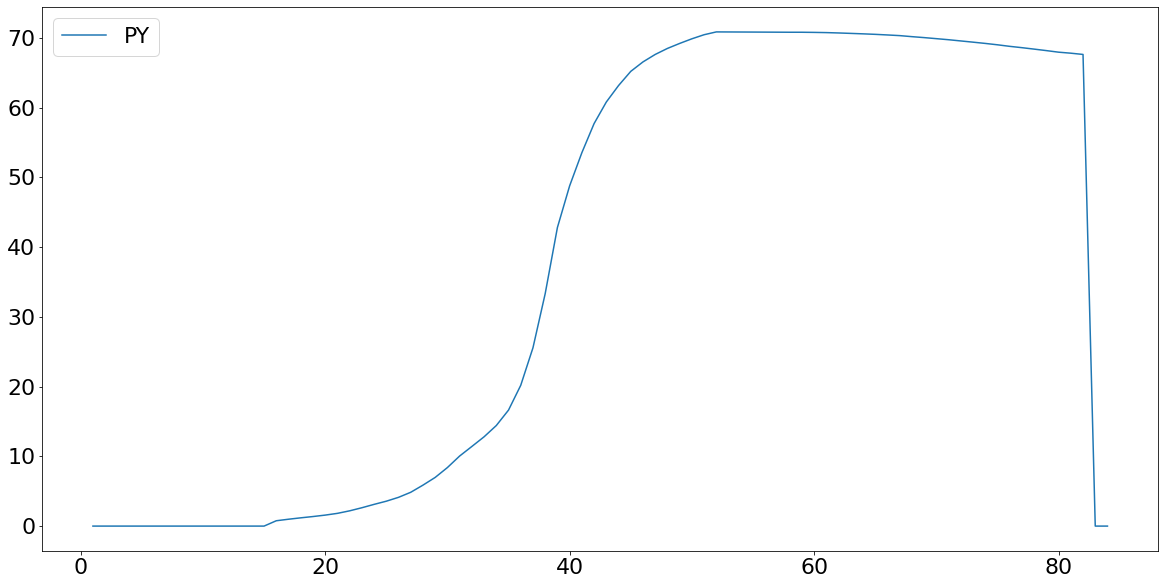

In [21]:
time=np.array(range(1,len(model.Outputs.Growth.index)))
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.plot(time,model.Outputs.Growth.loc[time,'CC']*100,label='PY')
plt.legend()

In [22]:
aq=pd.read_table('M:\AquaCropV61\AquaCropV61Nr02052018\SIMUL\Crop.OUT',skiprows=4, delim_whitespace=True,encoding="latin1")
aq=aq.drop([0])

In [23]:
aq.to_csv('aq_temp.csv')

In [24]:
aq=pd.read_csv('aq_temp.csv')

In [25]:
import matplotlib.pyplot as plt

In [26]:
aq

,Unnamed: 0,Day,Month,Year,DAP,Stage,GD,Z,StExp,StSto,...,Trx,Tr,TrW,Tr/Trx,WP,Biomass,HI,YieldPart,Brelative,WPet
0,1,1,5,1976,1,1,6.9,0.30,-9,-9,...,0.0,0.0,0.0,100,16.3,0.000,-9.9,0.000,-9.0,0.00
1,2,2,5,1976,2,1,7.5,0.30,-9,-9,...,0.0,0.0,0.0,100,16.3,0.000,-9.9,0.000,-9.0,0.00
2,3,3,5,1976,3,1,8.1,0.30,-9,-9,...,0.0,0.0,0.0,100,16.3,0.000,-9.9,0.000,-9.0,0.00
3,4,4,5,1976,4,1,8.9,0.30,-9,-9,...,0.0,0.0,0.0,100,16.3,0.000,-9.9,0.000,-9.0,0.00
4,5,5,5,1976,5,1,12.3,0.30,-9,-9,...,0.0,0.0,0.0,100,16.3,0.000,-9.9,0.000,-9.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,19,7,1976,80,4,17.9,1.49,-9,0,...,3.7,3.7,3.7,100,8.3,4.294,70.7,3.036,57.0,1.39
80,81,20,7,1976,81,4,18.3,1.49,-9,0,...,1.9,1.9,1.9,100,8.3,4.363,71.3,3.113,56.0,1.41
81,82,21,7,1976,82,4,11.3,1.49,-9,0,...,0.9,0.9,0.9,100,8.5,4.433,71.9,3.185,56.0,1.44
82,83,22,7,1976,83,4,13.7,1.49,-9,0,...,2.3,2.3,2.3,100,8.5,4.503,72.3,3.255,56.0,1.45


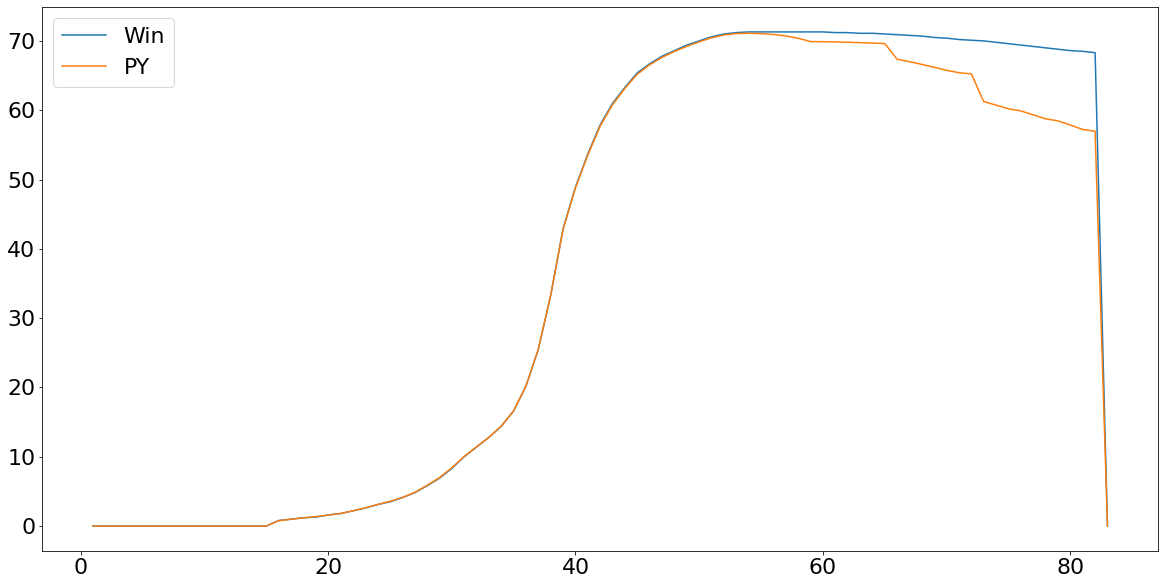

In [27]:
time=np.array(range(1,len(aq.index)))
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.plot(time,aq.loc[time,'CC'],label='Win')
plt.plot(time,model.Outputs.Growth.loc[time,'CC']*100,label='PY')
plt.legend()

In [52]:
model.Crop.SenescenceCD

67

<Figure size 432x288 with 0 Axes>

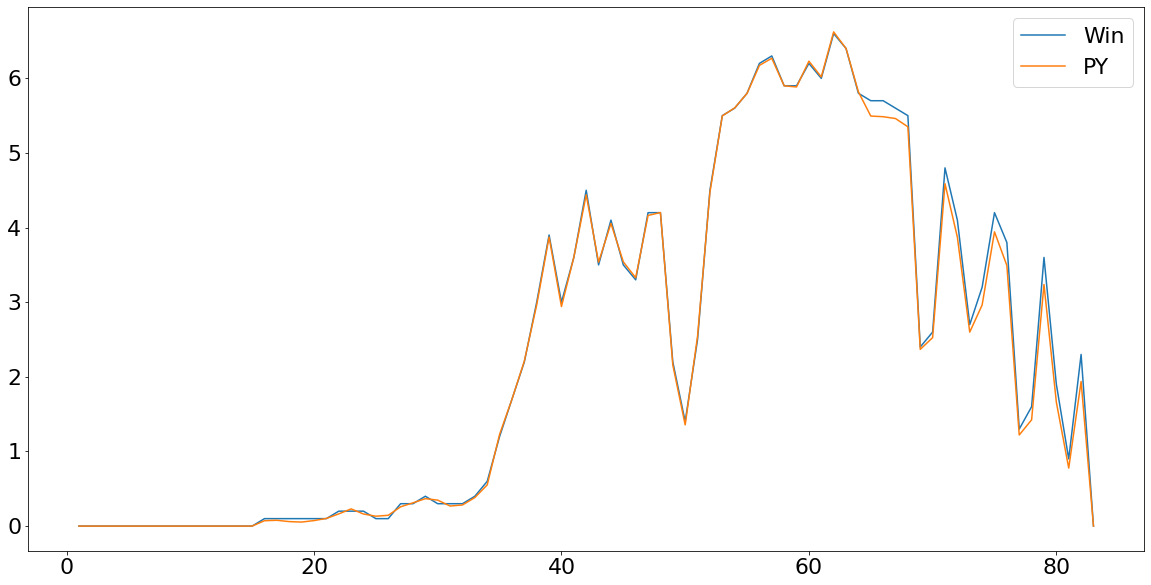

In [48]:
plt.figure()
plt.figure(figsize=(20,10))
plt.plot(time,aq.loc[time,'Tr'],label='Win')
plt.plot(time,model.Outputs.Growth.loc[time,'Tr'],label='PY')
plt.legend()

<Figure size 432x288 with 0 Axes>

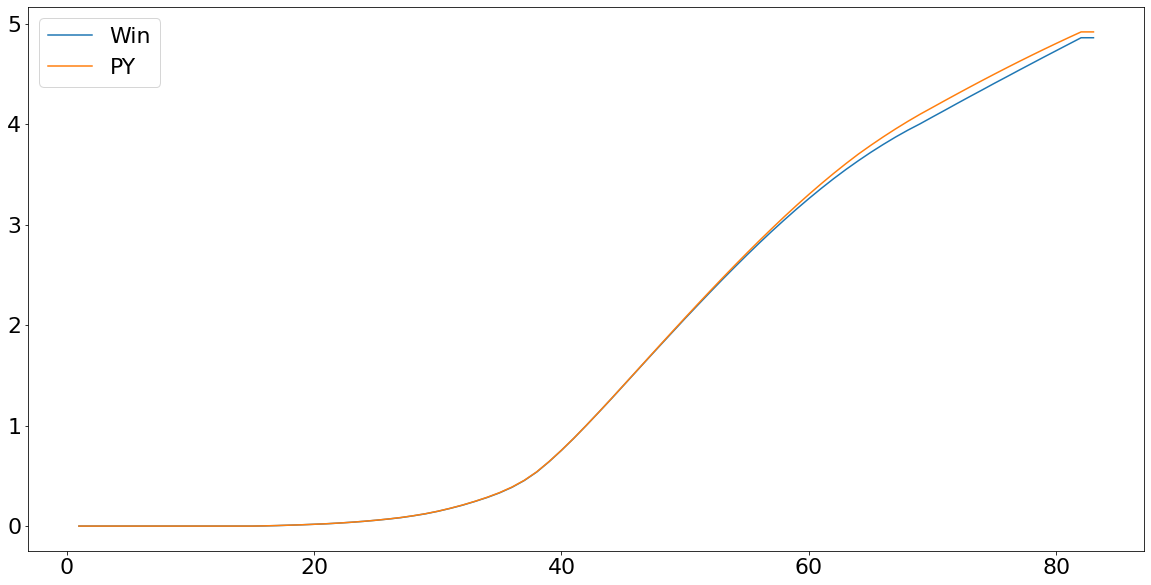

In [49]:
plt.figure()
plt.figure(figsize=(20,10))
plt.plot(time,aq.loc[time,'Biomass'],label='Win')
plt.plot(time,model.Outputs.Growth.loc[time,'B']/100,label='PY')
plt.legend()

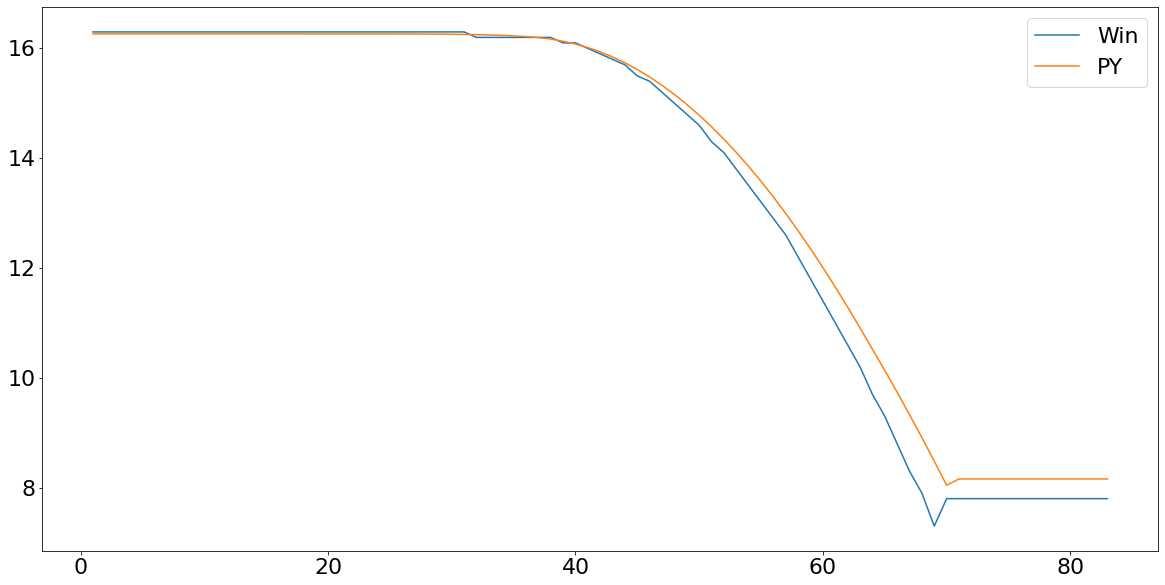

In [50]:
#time=range(1,175)
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.plot(time,aq.loc[time,'WP'],label='Win')
plt.plot(time,model.Outputs.Growth.loc[time,'NewCond.WPadj'],label='PY')
plt.legend()

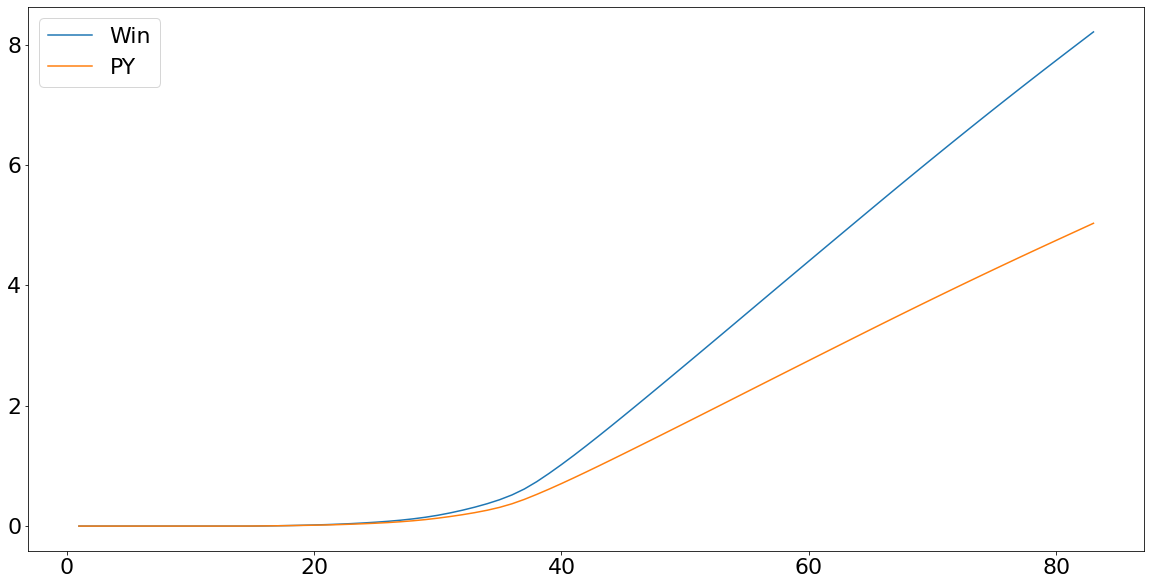

In [31]:
#time=range(1,175)
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.plot(time,model.Crop.Bio_top[time]*model.Crop.WP*model.Crop.fCO2/100,label='Win')
plt.plot(time,model.Outputs.Growth.loc[time,'B_NS']/100,label='PY')
plt.legend()
